# Descriptive analysis

tbc

## Set up

In [1]:
# Linting
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
# Import packages and functions
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [3]:
# Set paths and filenames
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and files.'''

    data_path = './../output/'
    data_filename = 'reformatted_data_restricted.csv'
    notebook = '01'


paths = Paths()

In [4]:
# Load data
data = pd.read_csv(os.path.join(paths.data_path, paths.data_filename))

## Functions

In [5]:
def n_freq(series):
    '''
    Finds value counts and their frequency
    Input series e.g. data[col], data[[col1, col2]],
    data.groupby(col1)[col2]
    '''
    res = pd.concat(
        [series.value_counts(dropna=False),
         series.value_counts(dropna=False, normalize=True)],
        axis=1,
        keys=('n', 'freq'))
    if res.index.nlevels > 1:
        res = res.reset_index()
    return (res)

## Overview of dataset

In [6]:
# Show shape of the data
data.shape

(139291, 68)

In [7]:
# List all columns and show their data types and proportion of completed data
data_types = data.dtypes
completion = data.count() / data.shape[0]
data_info = pd.DataFrame({'Data type': data_types,
                          'Proportion complete': completion})

# Show dataframe
data_info

,Data type,Proportion complete
Unnamed: 0,int64,1.0
id,int64,1.0
stroke_team,object,1.0
age,float64,1.0
male,int64,1.0
...,...,...
thrombolysis_no_but_age,int64,1.0
thrombolysis_no_but_improving,int64,1.0
thrombolysis_no_but_too_mild_severe,int64,1.0
thrombolysis_no_but_time_unknown_wake_up,int64,1.0


## Admissions

Restricted dataset

In [8]:
# Total admissions
len(data.index)

139291

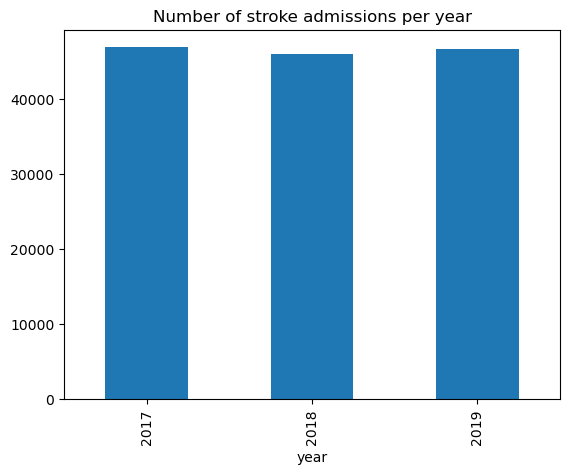

In [9]:
# Admissions per year
yearly_admissions = data.groupby('year').size().reset_index(name='admissions')
yearly_admissions.plot.bar(x='year', y='admissions',
                           title='Number of stroke admissions per year',
                           legend=None)
plt.show()

In [10]:
# Mean admissions per year
round(yearly_admissions['admissions'].mean(), 2)

46430.33

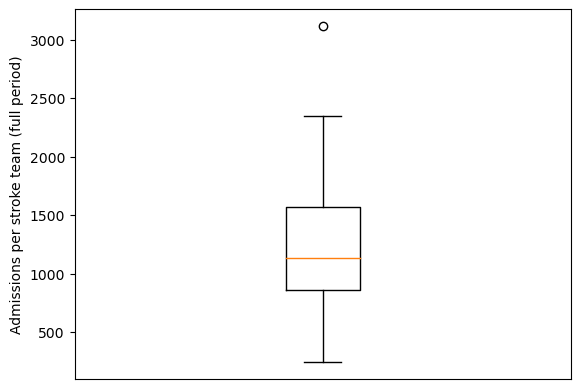

In [11]:
# Admissions per stroke team
team_admissions = data.groupby('stroke_team').size()

# Plot distribution of admissions
plt.boxplot(team_admissions)
plt.ylabel('Admissions per stroke team (full period)')

# Remove x axis ticks as only one variable
plt.tick_params(axis='x', which='both', bottom=False,
                top=False, labelbottom=False)

plt.show()

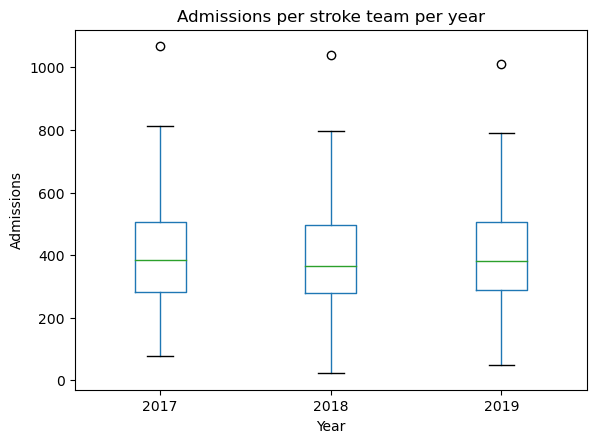

In [12]:
# Find number of admissions per stroke team per year
team_admissions_yearly = (data
                          .groupby(['stroke_team', 'year'])
                          .size()
                          .reset_index(name='admissions'))

# Plot per year
team_admissions_yearly.boxplot('admissions', by='year')
plt.xlabel('Year')
plt.ylabel('Admissions')
plt.title('Admissions per stroke team per year')
plt.suptitle('')
plt.grid(None)
plt.show()

## Stroke types

In [13]:
n_freq(data['infarction'].map({1: 'Infarction',
                               0: 'Primary Intracerebral Haemorrage'}))

,n,freq
Infarction,120785,0.867141
Primary Intracerebral Haemorrage,18506,0.132859


## Thrombolysis and thrombectomy

In [14]:
# Thrombolysis use
n_freq(data['thrombolysis'])

,n,freq
0,119944,0.861104
1,19347,0.138896


In [15]:
# Thrombectomy use
n_freq(data['thrombectomy'])

,n,freq
0,137595,0.987824
1,1696,0.012176


In [16]:
# Thrombolysis and/or thrombectomy use
n_freq(data[['thrombolysis', 'thrombectomy']]).sort_values(by='thrombolysis')

,thrombolysis,thrombectomy,n,freq
0,0,0,119292,0.856423
3,0,1,652,0.004681
1,1,0,18303,0.131401
2,1,1,1044,0.007495


In [17]:
# Arrival by ambulance
n_freq(data['arrive_by_ambulance'])

,n,freq
1.0,139291,1.0


In [18]:
# Thrombolysis use, depending on whether arrived by ambulance
(n_freq(data.groupby('arrive_by_ambulance')['thrombolysis'])
 .sort_values(by='arrive_by_ambulance'))

,arrive_by_ambulance,thrombolysis,n,freq
0,1.0,0,119944,0.861104
1,1.0,1,19347,0.138896


## Reasons for no thrombolysis

It is possible to have multiple reasons why no thrombolysis was given.

To do:
* What are the most common reasons
* How often is it a combination of reasons
* How often is no reason provided
* Double-check this is only complete when there was no thrombolysis
* Look further (e.g. subgroups, characteristics, associations)

In [19]:
(data[[col for col in data if col.startswith('thrombolysis_no')]]
 .value_counts(dropna=False)
 .reset_index(name='count'))

,thrombolysis_no_not_available,thrombolysis_no_out_of_hours,thrombolysis_no_scan_not_quick_enough,thrombolysis_no_no_reason,thrombolysis_no_but_haemorrhagic,thrombolysis_no_but_time_window,thrombolysis_no_but_comorbidity,thrombolysis_no_but_medication,thrombolysis_no_but_refusal,thrombolysis_no_but_age,thrombolysis_no_but_improving,thrombolysis_no_but_too_mild_severe,thrombolysis_no_but_time_unknown_wake_up,thrombolysis_no_but_other_medical,count
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,29472
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,23700
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19347
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,18265
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1
240,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1
241,0,0,0,0,0,1,1,1,0,0,1,0,1,0,1
242,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1


## Disability at 6 months

Currently, outcome models are just based on discharge disability. The majority of patients are missing disability at 6 months - but this is not likely to be missing at random.

In [20]:
# tbc
# e.g. disability at discharge v.s. at 6 months, is it typically 1 mRS better